# Section 1 | Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("data/Tempat-Wisata-Toba-Preprocessing.csv")

In [3]:
data.shape

(43226, 9)

In [4]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'address', 'PlaceID',
       'Nama_tempat_wisata', 'Category', 'ReviewerId', 'Rating', 'Reviews'],
      dtype='object')

In [5]:
data = data.rename(columns={'ReviewerId': 'user_id', 'PlaceID': 'item_id', 'Rating': 'rating'})
data['rating'] = data['rating'].astype(float)
data.dropna(inplace=True)
data.head(5)

,Unnamed: 0.1,Unnamed: 0,address,item_id,Nama_tempat_wisata,Category,user_id,rating,Reviews
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k
6,6,6,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.142390e+20,5.0,amazing pengen kesini lagi
8,8,8,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.047430e+20,3.0,jalan menuju lokasi perlu diperhatikan oleh pe...


In [6]:
col_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'address', 'Category', 'Reviews']
data = data.drop(columns=col_to_drop)
data.head()

,item_id,Nama_tempat_wisata,user_id,rating
1,0,PASIR PUTIH LUMBAN BULBUL,1.119090e+20,5.0
3,0,PASIR PUTIH LUMBAN BULBUL,1.130720e+20,5.0
4,0,PASIR PUTIH LUMBAN BULBUL,1.061730e+20,5.0
6,0,PASIR PUTIH LUMBAN BULBUL,1.142390e+20,5.0
8,0,PASIR PUTIH LUMBAN BULBUL,1.047430e+20,3.0


In [7]:
data.shape

(22166, 4)

# Section 2 | Data Splitting

In [8]:
# Step 1: Split into 85% training+validation and 15% test
train_val_data, test_data = train_test_split(data, test_size=0.15, random_state=42)
# Step 2: Define validation size as 17% of train+validation, rounded up
val_size = int(len(train_val_data) * 0.17) + 1
# Step 3: Split 85% data into training (about 70% of original) and validation (about 15% of original)
train_data, val_data = train_test_split(train_val_data, test_size=val_size, random_state=42)
# Check sizes
print(f"Train data size: {train_data.shape}")
print(f"Validation data size: {val_data.shape}")
print(f"Test data size: {test_data.shape}")

Train data size: (15638, 4)
Validation data size: (3203, 4)
Test data size: (3325, 4)


# Section 3 | Create User-Item Matrix

In [9]:
def create_user_item_matrix(data, user_col='user_id', item_col='Nama_tempat_wisata', rating_col='rating'):
    data = data.groupby([user_col, item_col])[rating_col].mean().reset_index()
    return data.pivot(index=user_col, columns=item_col, values=rating_col).fillna(0)

# Apply the function to create matrices for each split
train_matrix = create_user_item_matrix(train_data)
val_matrix = create_user_item_matrix(val_data).reindex(columns=train_matrix.columns, fill_value=0)
test_matrix = create_user_item_matrix(test_data).reindex(columns=train_matrix.columns, fill_value=0)

In [10]:
train_matrix

Nama_tempat_wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tao Silalahi Hotel,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Bukit Gibeon,Wisata Rumah Pohon
user_id,,,,,,,,,,,,,,,,,,,,,
1.000030e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000040e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000090e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.184390e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184410e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184430e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Define RMSE, MAE, MAP, Precision, & Recall Calculation Function 

In [11]:
def compute_rmse(true_matrix, approx_matrix):
    return np.sqrt(mean_squared_error(true_matrix.ravel(), approx_matrix.ravel()))

In [12]:
from sklearn.metrics import mean_absolute_error

def compute_mae(true_matrix, approx_matrix):
    return mean_absolute_error(true_matrix.ravel(), approx_matrix.ravel())

In [13]:
def precision_at_k(true_matrix, approx_matrix, k=10):
    """
    Computes Precision@k for the recommendation system.
    """
    precision = []
    for i in range(true_matrix.shape[0]):
        true_ratings = true_matrix.values[i]  # Use .values to get the underlying NumPy array
        approx_ratings = approx_matrix[i]
        
        # Get indices of top-k recommended items
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        
        # Check how many of the top-k recommended items are actually relevant (non-zero rating)
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)
        precision.append(relevant_items / k)
    
    return np.mean(precision)

In [14]:
def recall_at_k(true_matrix, approx_matrix, k=10):
    """
    Computes Recall@k for the recommendation system.
    """
    recall = []
    for i in range(true_matrix.shape[0]):
        true_ratings = true_matrix.values[i]  # Use .values to get the underlying NumPy array
        approx_ratings = approx_matrix[i]
        
        # Get indices of top-k recommended items
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        
        # Check how many of the relevant items (non-zero ratings) are retrieved in the top-k
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)
        total_relevant = np.sum(true_ratings > 0)
        
        # If there are no relevant items for the user, avoid division by zero
        if total_relevant == 0:
            recall.append(0)
        else:
            recall.append(relevant_items / total_relevant)
    
    return np.mean(recall)

In [15]:
def average_precision_at_k(true_matrix, approx_matrix, k=10):
    """
    Computes Average Precision@k for each user, then returns the Mean Average Precision@k.
    """
    avg_precision = []
    for i in range(true_matrix.shape[0]):
        true_ratings = true_matrix.values[i]  # Use .values to get the underlying NumPy array
        approx_ratings = approx_matrix[i]
        
        # Get indices of top-k recommended items
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        
        # Calculate precision at each rank in the top-k list
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)
        precision_at_i = np.array([1 if true_ratings[idx] > 0 else 0 for idx in top_k_indices])
        precision_at_i_cumsum = np.cumsum(precision_at_i) / (np.arange(k) + 1)
        
        # Average Precision for this user
        avg_precision_user = np.sum(precision_at_i_cumsum * precision_at_i) / relevant_items if relevant_items > 0 else 0
        avg_precision.append(avg_precision_user)
    
    return np.mean(avg_precision)

# SVD

## No Tuning

In [16]:
from sklearn.decomposition import TruncatedSVD

In [17]:
n_factors = 10
svd = TruncatedSVD(n_components=n_factors, random_state=42)
U_train = svd.fit_transform(train_matrix)
Sigma = svd.components_

train_svd = svd.fit_transform(train_matrix)
train_approx_matrix = svd.inverse_transform(train_svd)

In [18]:
test_svd = svd.transform(test_matrix)
test_approx_matrix = svd.inverse_transform(test_svd)
test_rmse = compute_rmse(test_matrix.values, test_approx_matrix)
test_mae = compute_mae(test_matrix.values, test_approx_matrix)

In [19]:
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test RMSE: 0.3965
Test MAE: 0.0765


In [20]:
k = 10
precision_k = precision_at_k(test_matrix, test_approx_matrix, k)
recall_k = recall_at_k(test_matrix, test_approx_matrix, k)
map_k = average_precision_at_k(test_matrix, test_approx_matrix, k)

In [21]:
print(f"Precision@{k}: {precision_k:.4f}")
print(f"Recall@{k}: {recall_k:.4f}")
print(f"MAP@{k}: {map_k:.4f}")

Precision@10: 0.0742
Recall@10: 0.6394
MAP@10: 0.4916


In [22]:
k = 5
precision_k_5 = precision_at_k(test_matrix, test_approx_matrix, k)
recall_k_5 = recall_at_k(test_matrix, test_approx_matrix, k)
map_k_5 = average_precision_at_k(test_matrix, test_approx_matrix, k)

In [23]:
print(f"Precision@{k}: {precision_k_5:.4f}")
print(f"Recall@{k}: {recall_k_5:.4f}")
print(f"MAP@{k}: {map_k_5:.4f}")

Precision@5: 0.1259
Recall@5: 0.5428
MAP@5: 0.4864


## With Tuning

In [24]:
latent_factors_range = np.arange(5, 51, 5)
train_rmse_list = []
val_rmse_list = []

In [25]:
for n_factors in latent_factors_range:
    # Inisialisasi model SVD
    svd = TruncatedSVD(n_components=n_factors, random_state=42)
    
    # Latih model pada data training
    train_svd = svd.fit_transform(train_matrix)
    train_approx_matrix = svd.inverse_transform(train_svd)
    
    # Hitung RMSE untuk data training
    train_rmse = compute_rmse(train_matrix.values, train_approx_matrix)
    train_rmse_list.append(train_rmse)
    
    # Latih model pada data validation
    val_svd = svd.transform(val_matrix)
    val_approx_matrix = svd.inverse_transform(val_svd)
    
    # Hitung RMSE untuk data validation
    val_rmse = compute_rmse(val_matrix.values, val_approx_matrix)
    val_rmse_list.append(val_rmse)

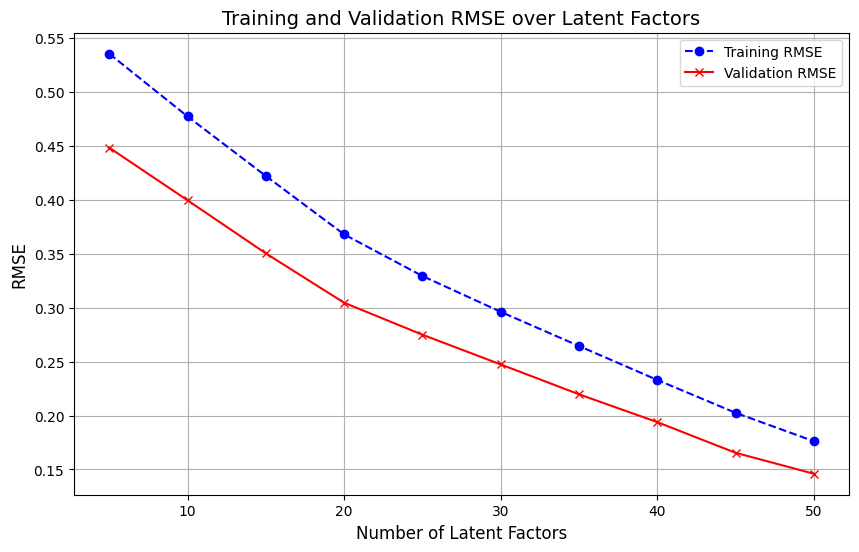

In [26]:
plt.figure(figsize=(10, 6))

plt.plot(latent_factors_range, train_rmse_list, label='Training RMSE', color='blue', marker='o', linestyle='--')
plt.plot(latent_factors_range, val_rmse_list, label='Validation RMSE', color='red', marker='x', linestyle='-')

plt.title('Training and Validation RMSE over Latent Factors', fontsize=14)
plt.xlabel('Number of Latent Factors', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

# Menambahkan grid
plt.grid(True)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [27]:
n_factors = 40
svd_tune = TruncatedSVD(n_components=n_factors, random_state=42)
U_train = svd_tune.fit_transform(train_matrix)
Sigma = svd_tune.components_

train_svd = svd_tune.fit_transform(train_matrix)
train_approx_matrix = svd_tune.inverse_transform(train_svd)

In [28]:
test_svd = svd_tune.transform(test_matrix)
test_approx_matrix = svd_tune.inverse_transform(test_svd)
test_rmse_tune = compute_rmse(test_matrix.values, test_approx_matrix)
test_mae_tune = compute_mae(test_matrix.values, test_approx_matrix)

In [29]:
print(f"Test RMSE: {test_rmse_tune:.4f}")
print(f"Test MAE: {test_mae_tune:.4f}")

Test RMSE: 0.1899
Test MAE: 0.0239


In [30]:
k = 10
precision_k_tune = precision_at_k(test_matrix, test_approx_matrix, k)
recall_k_tune = recall_at_k(test_matrix, test_approx_matrix, k)
map_k_tune = average_precision_at_k(test_matrix, test_approx_matrix, k)

In [31]:
print(f"Precision@{k}: {precision_k_tune:.4f}")
print(f"Recall@{k}: {recall_k_tune:.4f}")
print(f"MAP@{k}: {map_k_tune:.4f}")

Precision@10: 0.1084
Recall@10: 0.9317
MAP@10: 0.8875


In [32]:
k = 5
precision_k_tune5 = precision_at_k(test_matrix, test_approx_matrix, k)
recall_k_tune5 = recall_at_k(test_matrix, test_approx_matrix, k)
map_k_tune5 = average_precision_at_k(test_matrix, test_approx_matrix, k)

In [33]:
print(f"Precision@{k}: {precision_k_tune5:.4f}")
print(f"Recall@{k}: {recall_k_tune5:.4f}")
print(f"MAP@{k}: {map_k_tune5:.4f}")

Precision@5: 0.2058
Recall@5: 0.8838
MAP@5: 0.8854


In [34]:
before_tuning_error = {
    "val_rmse": test_rmse,
    "val_mae": test_mae,
}

In [35]:
before_tuning_evaluation = {
    "val_map": map_k,
    "val_precision": precision_k,
    "val_recall": recall_k
}

In [36]:
after_tuning_error = {
    "val_rmse": test_rmse_tune,
    "val_mae": test_mae_tune,
}

In [37]:
after_tuning_evaluation = {
    "val_map": map_k_tune,
    "val_precision": precision_k_tune,
    "val_recall": recall_k_tune
}

In [38]:
error_metrics_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE"],
    "Before Tuning": [before_tuning_error["val_rmse"], before_tuning_error["val_mae"]],
    "After Tuning": [after_tuning_error["val_rmse"], after_tuning_error["val_mae"]]
})

evaluation_metrics_df = pd.DataFrame({
    "Metric": ["MAP", "Precision", "Recall"],
    "Before Tuning": [before_tuning_evaluation["val_map"], before_tuning_evaluation["val_precision"], before_tuning_evaluation["val_recall"]],
    "After Tuning": [after_tuning_evaluation["val_map"], after_tuning_evaluation["val_precision"], after_tuning_evaluation["val_recall"]]
})

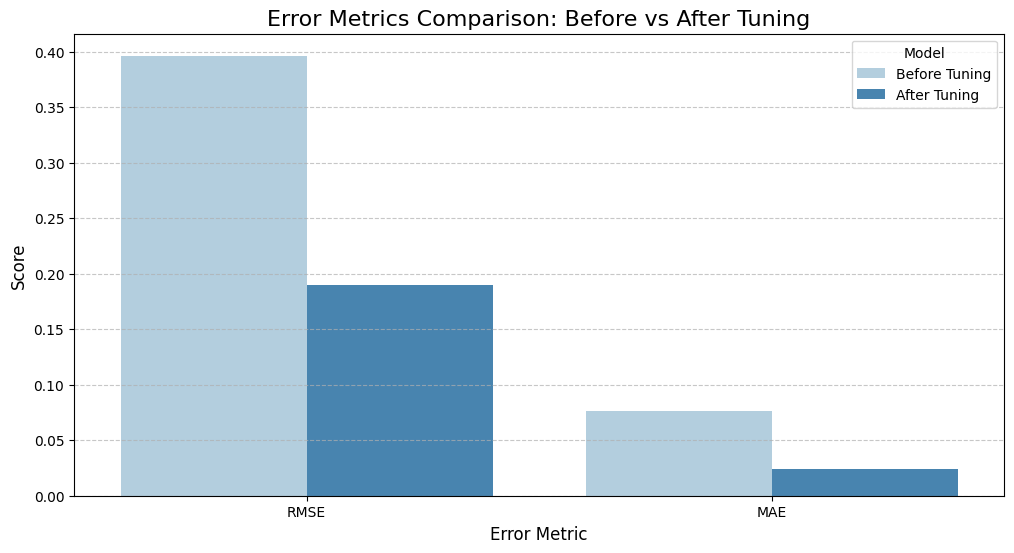

In [39]:
plt.figure(figsize=(12, 6))
error_metrics_melted = error_metrics_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=error_metrics_melted, x="Metric", y="Score", hue="Model", palette="Blues")
plt.title("Error Metrics Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Error Metric", fontsize=12)
plt.legend(title="Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

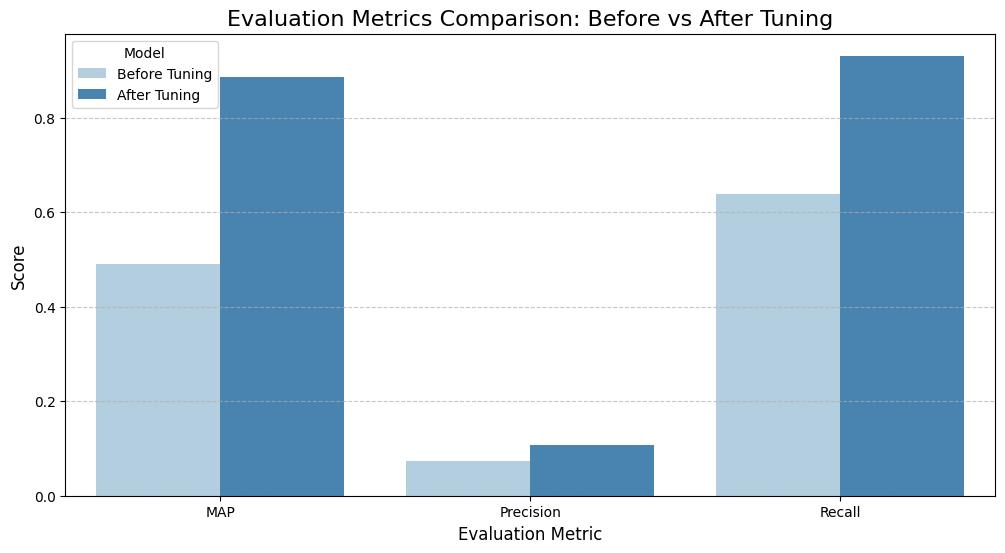

In [40]:
plt.figure(figsize=(12, 6))
evaluation_metrics_melted = evaluation_metrics_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=evaluation_metrics_melted, x="Metric", y="Score", hue="Model", palette="Blues")
plt.title("Evaluation Metrics Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.legend(title="Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Recommendation for user SVD

In [41]:
def recommend_places_for_user(user_id, train_matrix, svd_tune, k=10):
    """
    Memberikan rekomendasi tempat wisata untuk pengguna berdasarkan model SVD.
    
    Parameters:
    - user_id: ID pengguna yang ingin diberi rekomendasi
    - train_matrix: Matriks pengguna-item (train data)
    - svd: Model SVD yang sudah dilatih
    - k: Jumlah rekomendasi yang ingin diberikan
    
    Returns:
    - rekomendasi tempat wisata berdasarkan estimasi rating tertinggi
    """
    # Ambil indeks pengguna
    user_index = train_matrix.index.get_loc(user_id)
    
    # Prediksi rating untuk semua tempat wisata
    user_ratings = svd.transform(train_matrix)
    predicted_ratings = user_ratings[user_index, :]  # Rating yang diprediksi untuk pengguna ini
    
    # Urutkan tempat wisata berdasarkan prediksi rating tertinggi
    top_k_indices = np.argsort(predicted_ratings)[::-1][:k]  # Ambil k rating tertinggi
    
    # Ambil nama tempat wisata (kolom tempat wisata)
    recommended_places = train_matrix.columns[top_k_indices]
    
    # Filter tempat yang sudah ada rating-nya dari pengguna
    rated_places = train_matrix.loc[user_id][train_matrix.loc[user_id] > 0].index
    recommended_places = [place for place in recommended_places if place not in rated_places]
    
    return recommended_places[:k]

In [42]:
user_id = 1.000030e+20
recommended_places = recommend_places_for_user(user_id, train_matrix, svd_tune, k=10)

In [43]:
print(f"Rekomendasi tempat wisata untuk user {user_id}:")
for idx, place in enumerate(recommended_places, 1):
    print(f"{idx}. {place}")

Rekomendasi tempat wisata untuk user 1.00003e+20:
1. Batu Kursi Raja Siallagan ( Stone Chair of King Siallagan )
2. Bukit Burung
3. Aek Rangat Pangururan
4. Air Terjun Siboruon
5. Batu Gantung
6. Air Terjun Janji
7. BUKIT GIBEON (YAPIM TARUNA)
8. Air Terjun Efrata
9. Long Beach
10. Kota Balige


In [44]:
def recommend_places_for_all_users(train_matrix, svd, k=10):
    """
    Memberikan rekomendasi tempat wisata berdasarkan rating yang diprediksi untuk semua pengguna.
    
    Parameters:
    - train_matrix: Matriks pengguna-item (train data)
    - svd: Model SVD yang sudah dilatih
    - k: Jumlah rekomendasi yang ingin diberikan
    
    Returns:
    - rekomendasi tempat wisata berdasarkan rating tertinggi untuk semua pengguna
    """
    # Prediksi rating untuk seluruh pengguna
    all_ratings = svd.transform(train_matrix)
    
    # Hitung rata-rata prediksi rating untuk setiap tempat wisata (kolom)
    avg_ratings = np.mean(all_ratings, axis=0)
    
    # Urutkan tempat wisata berdasarkan prediksi rating tertinggi
    top_k_indices = np.argsort(avg_ratings)[::-1][:k]  # Ambil k rating tertinggi
    
    # Ambil nama tempat wisata (kolom tempat wisata)
    recommended_places = train_matrix.columns[top_k_indices]
    
    return recommended_places[:k]

In [45]:
recommended_places_all = recommend_places_for_all_users(train_matrix, svd_tune, k=10)

In [46]:
print("Rekomendasi tempat wisata berdasarkan rating semua pengguna:")
for idx, place in enumerate(recommended_places_all, 1):
    print(f"{idx}. {place}")

Rekomendasi tempat wisata berdasarkan rating semua pengguna:
1. Aek Rangat Pangururan
2. Air Terjun Siboruon
3. Batu Kursi Raja Siallagan ( Stone Chair of King Siallagan )
4. Bukit Holbung
5. Bukit Indah Simarjarunjung
6. Bukit Pahoda
7. BUKIT GIBEON (YAPIM TARUNA)
8. Batu Lihi Star
9. Caldera toba nomadic escape (glamour camping)
10. Bukit Doa
